In [45]:
import numpy as np
import pandas as pd
from pandas import read_csv
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [20]:
dallara_data_df = read_csv("climate_data/dallara_data.csv", delimiter=";")
dallara_data = dallara_data_df.values

contrails_data_altitude = dallara_data[0:12, 1]
contrails_data_forcing_factor = dallara_data[0:12, 0]
nox_o3_data_altitude = dallara_data[12:25, 1]
nox_o3_data_forcing_factor = dallara_data[12:25, 0]
nox_ch4_data_altitude = dallara_data[25:, 1]
nox_ch4_data_forcing_factor = dallara_data[25:, 0]

In [57]:
def ratr_contrails(time_horizon, sensitivity_rf_contrails, ratio_erf_rf_contrails, efficacy_erf_contrails):
    ratr = 5.5 * 10**14 * sensitivity_rf_contrails * ratio_erf_rf_contrails * efficacy_erf_contrails / time_horizon**0.825
    return ratr

def ratr_nox(time_horizon, sensitivity_rf_nox_o3, ratio_erf_rf_nox_o3, efficacy_erf_nox_o3, sensitivity_rf_nox_ch4, ratio_erf_rf_nox_ch4, efficacy_erf_nox_ch4):
    ratr = 5.9 * 10**14 * sensitivity_rf_nox_o3 * ratio_erf_rf_nox_o3 * efficacy_erf_nox_o3 / time_horizon**0.825 - 4.09 * 10**12 * (-sensitivity_rf_nox_ch4)**1.01 * ratio_erf_rf_nox_ch4**1.04 * efficacy_erf_nox_ch4**0.065 / time_horizon**0.693
    return ratr

In [58]:
scaling_factor_altitude_contrails = interp1d(
    contrails_data_altitude,
    contrails_data_forcing_factor,
    kind='linear',
)

scaling_factor_altitude_nox_o3 = interp1d(
    nox_o3_data_altitude,
    nox_o3_data_forcing_factor,
    kind='linear',
)

scaling_factor_altitude_nox_ch4 = interp1d(
    nox_ch4_data_altitude,
    nox_ch4_data_forcing_factor,
    kind='linear',
)

In [59]:
time_horizon = 100
sensitivity_rf_contrails = 2.23e-12
ratio_erf_rf_contrails = 0.42
efficacy_erf_contrails = 1
sensitivity_rf_nox_o3 = 25.1e-12 * (14/46)
ratio_erf_rf_nox_o3 = 1.37
efficacy_erf_nox_o3 = 1
sensitivity_rf_nox_ch4 = -0.83e-9
ratio_erf_rf_nox_ch4 = 1.18
efficacy_erf_nox_ch4 = 1

In [84]:
altitude = list(range(20000, 41000, 1000))
ratr_contrails_altitude = np.zeros(len(altitude))
ratr_nox_altitude = np.zeros(len(altitude))

for k in range(0, len(altitude)):
    scaling_factor_contrails = scaling_factor_altitude_contrails(altitude[k])
    scaling_factor_nox_o3 = scaling_factor_altitude_nox_o3(altitude[k])
    scaling_factor_nox_ch4 = scaling_factor_altitude_nox_ch4(altitude[k])
    ratr_contrails_altitude[k] = ratr_contrails(time_horizon, scaling_factor_contrails * sensitivity_rf_contrails, ratio_erf_rf_contrails, efficacy_erf_contrails)
    ratr_nox_altitude[k] = ratr_nox(time_horizon, scaling_factor_nox_o3 * sensitivity_rf_nox_o3, ratio_erf_rf_nox_o3, efficacy_erf_nox_o3, scaling_factor_nox_ch4 * sensitivity_rf_nox_ch4, ratio_erf_rf_nox_ch4, efficacy_erf_nox_ch4)

mean_ratr_contrails = ratr_contrails(time_horizon, sensitivity_rf_contrails, ratio_erf_rf_contrails, efficacy_erf_contrails)
mean_ratr_nox = ratr_nox(time_horizon, sensitivity_rf_nox_o3, ratio_erf_rf_nox_o3, efficacy_erf_nox_o3, sensitivity_rf_nox_ch4, ratio_erf_rf_nox_ch4, efficacy_erf_nox_ch4)

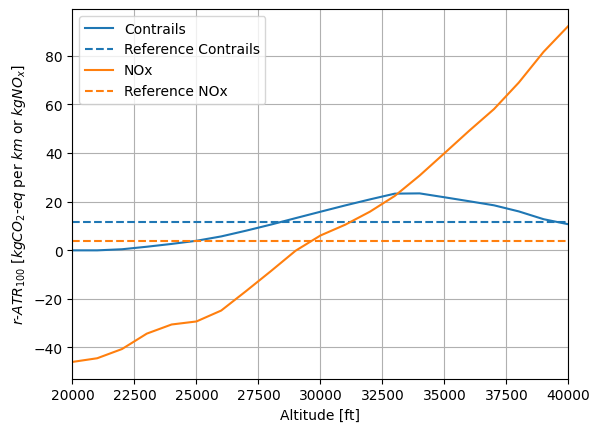

In [86]:
plt.plot(altitude, ratr_contrails_altitude, label="Contrails", color="C0")
plt.plot(altitude, mean_ratr_contrails * np.ones(len(altitude)), label="Reference Contrails", color="C0", linestyle="--")
plt.plot(altitude, ratr_nox_altitude, label="NOx", color="C1")
plt.plot(altitude, mean_ratr_nox * np.ones(len(altitude)), label="Reference NOx", color="C1", linestyle="--")
plt.xlabel('Altitude [ft]')
plt.ylabel(r'$r\text{-}ATR_{100}$ [$kgCO_2\text{-}eq$ per $km$ or $kgNO_x$]')
plt.legend()
plt.grid()
plt.xlim(20000, 40000)
plt.savefig("altitude.pdf")
plt.show()